In [29]:
# Installing necessary modules from the text file
!pip install -r requirements.txt

In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [31]:
# Reading dataset with special seperator
df = pd.read_csv("diabetes_data.csv", sep=";")

In [32]:
# First look to dataset
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Non diabetes samples make up 38.46 % of the dataset.
Diabetes samples make up 61.54 % of the dataset.


<AxesSubplot:xlabel='class', ylabel='count'>

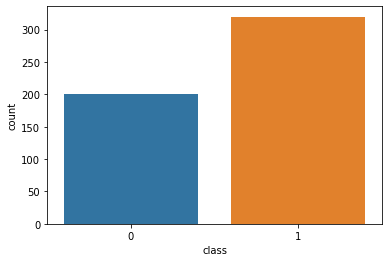

In [33]:
# Percentage of the classes
print("Non diabetes samples make up", round(df["class"].value_counts()[0] / len(df) * 100, 2), "% of the dataset.")
print("Diabetes samples make up", round(df["class"].value_counts()[1] / len(df) * 100, 2), "% of the dataset.")

sns.countplot(x="class", data=df)

In [34]:
# Encoding gender feature with LabelEncoder
enc = LabelEncoder()
df["gender"] = enc.fit_transform(df["gender"].astype(str))

df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [35]:
# Creating the normalized dataset with MinMaxScaler algorithm
scaler = MinMaxScaler()
normalized_df = df.copy()
normalized_df["age"] = scaler.fit_transform(normalized_df["age"].values.reshape(-1, 1))

normalized_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [36]:
normalized_non_diabetes = normalized_df[normalized_df["class"] == 0]
normalized_diabetes = normalized_df[normalized_df["class"] == 1]

# Shape of our normalized dataframe elements.
data = {"Class": ["Non-Diabetes", "Diabetes"], "Shape": [normalized_non_diabetes.shape, normalized_diabetes.shape]}
info_df = pd.DataFrame(data)
info_df

,Class,Shape
0,Non-Diabetes,"(200, 17)"
1,Diabetes,"(320, 17)"


In [37]:
# Clustering part
from sklearn.cluster import KMeans

clustered_df = df.copy()
X_clustered = clustered_df.drop("class", axis=1)
y_clustered = clustered_df["class"]


clustered_df["class"] = KMeans(n_clusters=clustered_df["class"].nunique(dropna = True), random_state=0).fit_predict(X_clustered)
clustered_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0


In [38]:
from sklearn.cluster import KMeans

clustered_normalized_df = normalized_df.copy()
X_clustered_normalized = clustered_normalized_df.drop("class", axis=1)
y_clustered_normalized = clustered_normalized_df["class"]

clustered_normalized_df["class"] = KMeans(n_clusters=2, random_state=0).fit_predict(X_clustered_normalized)
clustered_normalized_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


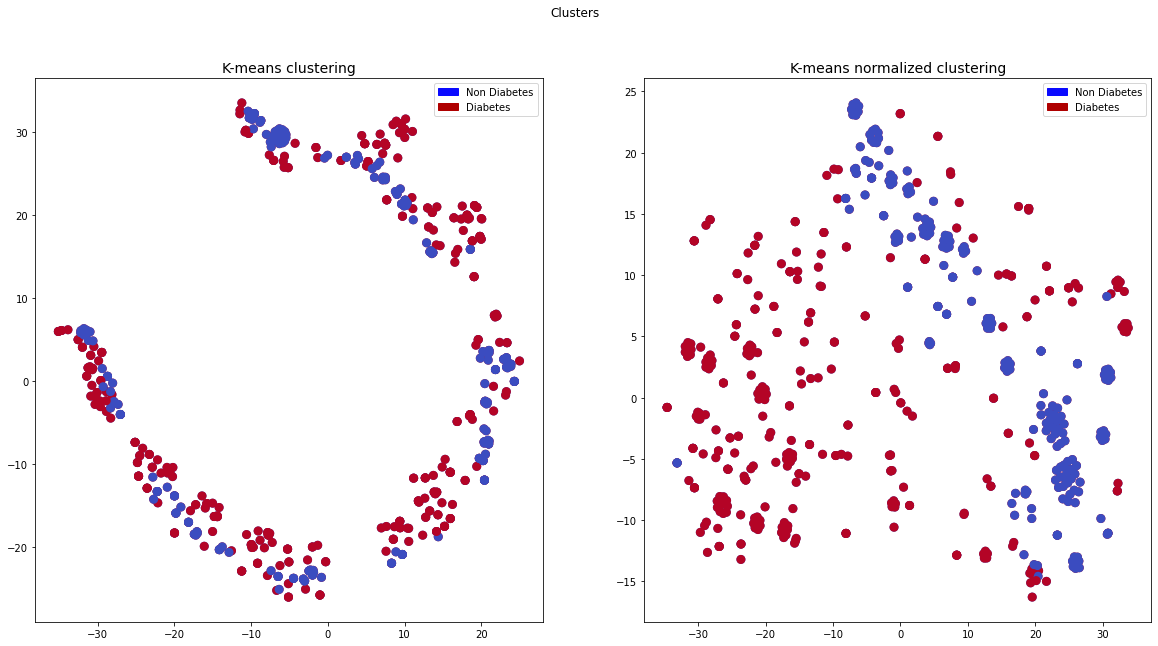

In [39]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

reduced_X_tSNE = TSNE(n_components=2, random_state=0).fit_transform(X_clustered.values)
reduced_X_tSNE_normalized = TSNE(n_components=2, random_state=0).fit_transform(X_clustered_normalized.values)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))
f.suptitle("Clusters")

#t-SNE scatter plot
ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y_clustered == 0), cmap="coolwarm", label="Non Diabetes",
            linewidths=3)
ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y_clustered == 1), cmap="coolwarm", label="Diabetes",
            linewidths=3)
ax1.set_title("K-means clustering", fontsize=14)
ax1.grid(False)

ax2.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_clustered == 0), cmap="coolwarm", label="Non Diabetes",
            linewidths=3)
ax2.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_clustered == 1), cmap="coolwarm", label="Diabetes",
            linewidths=3)
ax2.set_title("K-means normalized clustering", fontsize=14)
ax2.grid(False)

blue_legend = mpatches.Patch(color="#0A0AFF", label="Non Diabetes")
red_legend = mpatches.Patch(color="#AF0000", label="Diabetes")
ax1.legend(handles=[blue_legend, red_legend])
ax2.legend(handles=[blue_legend, red_legend])

#

In [40]:
from sklearn.model_selection import train_test_split

x_train_df, x_test_df, Y_train_df, Y_test_df = train_test_split(df.loc[:,df.columns != 'class'], df.loc[:,['class']], test_size=0.2, random_state=1)
x_train_clustered_df, x_test_clustered_df,Y_train_clustered_df, Y_test_clustered_df = train_test_split(clustered_df.loc[:,clustered_df.columns != 'class'], clustered_df.loc[:,['class']], test_size=0.2, random_state=1)
x_train_normalized_df, x_test_normalized_df, Y_train_normalized_df, Y_test_normalized_df = train_test_split(normalized_df.loc[:,normalized_df.columns != 'class'], normalized_df.loc[:,['class']], test_size=0.2, random_state=1)
x_train_clustered_normalized_df, x_test_clustered_normalized_df, Y_train_clustered_normalized_df, Y_test_clustered_normalized_df = train_test_split(clustered_normalized_df.loc[:,clustered_normalized_df.columns != 'class'], clustered_normalized_df.loc[:,['class']], test_size=0.2, random_state=1)

In [41]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
normalized_knn = KNeighborsClassifier()
clustered_knn = KNeighborsClassifier()
clustered_normalized_knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid_df = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_normalized_df = GridSearchCV(normalized_knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_clustered_df = GridSearchCV(clustered_knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_clustered_normalized_df = GridSearchCV(clustered_normalized_knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 93.26%


In [42]:
from sklearn.metrics import accuracy_score

# fitting the model for grid search
grid_search=grid_df.fit(x_train_df, np.array(Y_train_df).ravel())

print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

knn = grid_search.best_estimator_

knn.fit(x_train_df, np.array(Y_train_df).ravel())

y_test_hat=knn.predict(x_test_df)

test_accuracy=accuracy_score(Y_test_df,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 91.35%


In [42]:
# fitting the model for grid search
grid_search=grid_normalized_df.fit(x_train_normalized_df, np.array(Y_train_normalized_df).ravel())

print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

knn = grid_search.best_estimator_

knn.fit(x_train_normalized_df, np.array(Y_train_normalized_df).ravel())

y_test_hat=knn.predict(x_test_normalized_df)

test_accuracy=accuracy_score(Y_test_normalized_df,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

In [ ]:
# fitting the model for grid search
grid_search=grid_clustered_df.fit(x_train_clustered_df, np.array(Y_train_clustered_df).ravel())

print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

knn = grid_search.best_estimator_

knn.fit(x_train_clustered_df, np.array(Y_train_clustered_df).ravel())

y_test_hat=knn.predict(x_test_clustered_df)

test_accuracy=accuracy_score(Y_test_clustered_df,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

In [ ]:
# fitting the model for grid search
grid_search=grid_clustered_df.fit(x_train_clustered_df, np.array(Y_train_clustered_df).ravel())

print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

knn = grid_search.best_estimator_

knn.fit(x_train_clustered_df, np.array(Y_train_clustered_df).ravel())

y_test_hat=knn.predict(x_test_clustered_df)

test_accuracy=accuracy_score(Y_test_clustered_df,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )